In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import itertools

In [ ]:
filelist = ["4hb395_overD25.txt"]
data = {}

In [ ]:
def read_spr(filename):

    df = pd.read_table(filename)
    df = df.drop(columns=[x for x in df.columns.values if x.startswith("Unnamed")])
    
    #rename columns
    colnames = [";".join(x.strip().split(";")[-2:]).strip() for x in df.columns.values]
    newcols = {}
    for i in range(len(colnames)):
        newcols[df.columns.values[i]] = colnames[i]
    df2 = df.rename(columns=newcols)
    # clean up - separate raw/fitted - remove NaN - cast to float
    df_nf = df2[[x for x in df2.columns.values if "fitted" not in x]].replace("NaN ", np.nan).dropna(axis=0, how='any').copy()
    df_ft = df2[[x for x in df2.columns.values if "fitted" in x]].copy()
    df_nf["time"] = df_nf[[x for x in df_nf.columns.values if x.endswith("X")]].mean(axis=1)
    df_nf.drop(columns=[x for x in df_nf.columns.values if x.endswith("X")], inplace=True)
    df_nf = df_nf.astype('float64')
    df_ft["time"] = df_ft[[x for x in df_ft.columns.values if x.endswith("X")]].mean(axis=1)
    df_ft.drop(columns=[x for x in df_ft.columns.values if x.endswith("X")], inplace=True)
    df_ft = df_ft.astype('float64')
    analyte = [x for x in df_nf.columns.values if x is not "time"][0].split(";")[0].strip()
    colnames = [";".join(x.strip().split(";")[-2:]).strip() for x in df.columns.values]
    return {analyte:{"raw":df_nf, "fitted":df_ft}}

def plot_spr(data, proteinID,title):
    concentrations = [x.split(";")[-1].split("_")[0].split("=")[-1] for x in data["raw"].columns.values if "Y" in x]
    palette = sns.color_palette("Set1", n_colors=len(concentrations))
    for i, conc in enumerate(concentrations):#, "0.03125", "0.015625"]):
        plt.plot(data["raw"]["time"],
        data["raw"]["{0}; conc={1}_Y".format(analyte, conc)], color="black", linestyle='solid')
        plt.plot(data["fitted"]["time"],
        data["fitted"]["{0}; conc={1} fitted curve_Y".format(analyte, conc)], color="red", linestyle='solid')
    plt.xlabel("Time [seconds]",fontsize = 12)
    plt.ylabel("Response Units",fontsize = 12)
    plt.title(title)
    plt.show()

In [ ]:
for e in filelist:
    data.update(read_spr(e))
    for analyte in data:
        plot_spr(data[analyte], analyte, e)
        plt.show()

In [6]:
import rstoolbox
import pandas as pd
import matplotlib.pyplot as plt
from rstoolbox.io import read_SPR
from rstoolbox.plot import plot_SPR

In [7]:
infile = ["4hb395_overD25.txt","4hb395_over5c4.txt"]
infilecsv = []
for e in infile:
    f = pd.read_csv(e,sep='\t')
    f.to_csv(e)
    infilecsv.append(e.rsplit('.', 1)[0] + '.csv')

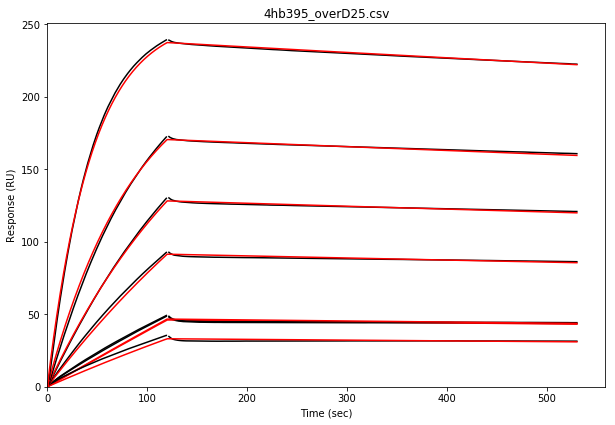

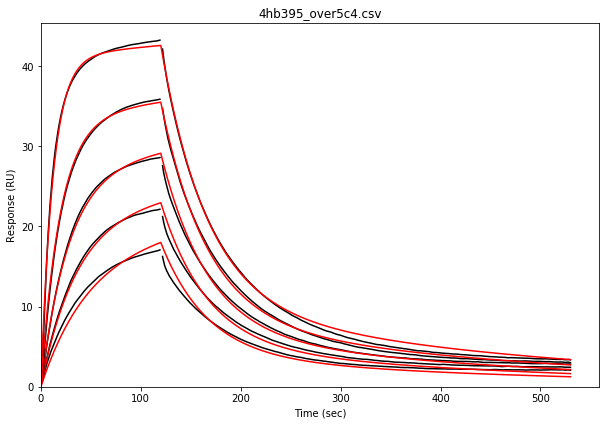

In [12]:
for e in infilecsv:
    df = read_SPR(e)
    fig = plt.figure(figsize=(10, 6.7))
    ax = plt.subplot2grid((1, 1), (0, 0))
    plt.title(e)
    plot_SPR(df, ax, datacolor='black', fitcolor='red')
    plt.show()